安裝 Tensofrlow






*   ! pip uninstall numpy -y
*  ! pip install numpy
*   ! pip uninstall tensorflow -y
*   ! pip install tensorflow





In [0]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello World')
sess = tf.Session()
sess.run(hello)

b'Hello World'

Constant

In [4]:
import tensorflow as tf
x = tf.constant(100)
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [5]:
type(x)

tensorflow.python.framework.ops.Tensor

Session

In [6]:
sess = tf.Session()
sess.run(x)

100

In [7]:
type(sess.run(x))

numpy.int32

Operation

In [0]:
x = tf.constant(2)
y = tf.constant(3)

In [9]:
with tf.Session() as sess:
    print(sess.run(x+y))
    print(sess.run(x-y))
    print(sess.run(x*y))
    print(sess.run(x/y))

5
-1
6
0.6666666666666666


**Placeholder**

In [0]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [11]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [12]:
type(x)

tensorflow.python.framework.ops.Tensor

定義操作

In [0]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [0]:
d = {x:20,y:30}

In [15]:
with tf.Session() as sess:
    print(sess.run(add,feed_dict=d))
    print(sess.run(sub,feed_dict=d))
    print(sess.run(mul,feed_dict=d))

50
-10
600


In [0]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [17]:
a.shape

(1, 2)

In [18]:
b.shape

(2, 1)

矩陣乘積

In [0]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [0]:
matrix_multi = tf.matmul(mat1,mat2)

In [21]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


## 使用TensorFlow 建構神經網路

### 讀取數據集

In [22]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

W0619 07:20:23.909187 140353463015296 deprecation.py:323] From <ipython-input-22-fbc3036e4c69>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0619 07:20:23.911139 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0619 07:20:23.913135 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W0619 07:20:29.869423 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0619 07:20:29.872677 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W0619 07:20:30.245453 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [23]:

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [24]:
type(mnist.train.images)


numpy.ndarray

In [25]:
mnist.train.images.shape

(55000, 784)

In [26]:
mnist.test.images.shape

(10000, 784)

In [27]:
mnist.train.images[2].shape

(784,)

In [0]:
#mnist.train.images[2]

In [0]:
sample_image = mnist.train.images[2].reshape(28,28)

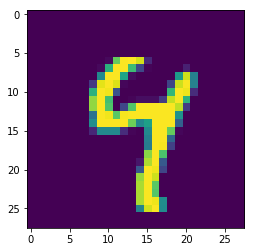

In [31]:
import matplotlib.pyplot as plt

plt.imshow(sample_image)

### 建構神經網路

In [0]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [0]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [0]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [0]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重與偏倚

In [0]:

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [0]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [0]:
pred = multilayer_perceptron(x, weights, biases)

### 代價函數

In [39]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

W0619 07:31:55.280743 140353463015296 deprecation.py:323] From <ipython-input-39-c98ca870291b>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 初始化變量

In [0]:
init = tf.global_variables_initializer()

### 訓練模型

In [0]:
Xsamp,ysamp = mnist.train.next_batch(1)

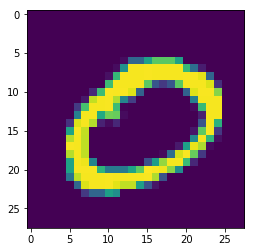

In [42]:
plt.imshow(Xsamp.reshape(28,28))

In [43]:
print(ysamp)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 執行會話

In [44]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=152.20003409992572
Epoch: 2 cost=57.86332084482362
Epoch: 3 cost=43.008477136438565
Epoch: 4 cost=35.11312592072922
Epoch: 5 cost=29.93497806158933
Epoch: 6 cost=26.238624988916243
Epoch: 7 cost=23.183933492573818
Epoch: 8 cost=20.935372982675382
Epoch: 9 cost=19.025030286041158
Epoch: 10 cost=17.453176645799136
Epoch: 11 cost=16.176302986470127
Epoch: 12 cost=14.97571255412968
Epoch: 13 cost=14.007973997376176
Epoch: 14 cost=13.070846117111763
Epoch: 15 cost=12.261210125210615
Training Completed in 15 Epochs


### 模型評估

In [0]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [46]:
correct_predictions[0]

<tf.Tensor 'strided_slice:0' shape=() dtype=bool>

In [0]:
correct_predictions = tf.cast(correct_predictions, "float")

In [0]:
accuracy = tf.reduce_mean(correct_predictions)

In [49]:

type(accuracy)

tensorflow.python.framework.ops.Tensor

In [50]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [51]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))


Accuracy: 0.9142


## 使用Keras 建構模型

In [52]:
import keras

Using TensorFlow backend.


### 讀取MNIST 數據

In [53]:

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
x_test.shape

(10000, 28, 28)

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [59]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [60]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

### 設定網路參數

In [0]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立神經網路

In [0]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

### 訓練神經網路

In [68]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0619 08:27:01.752794 140353463015296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0619 08:27:01.808294 140353463015296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 57us/step - loss: 1.0151 - acc: 0.7590 - val_loss: 0.4690 - val_acc: 0.8824
Epoch 2/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.4143 - acc: 0.8898 - val_loss: 0.3443 - val_acc: 0.9059
Epoch 3/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.3372 - acc: 0.9062 - val_loss: 0.3004 - val_acc: 0.9152
Epoch 4/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2998 - acc: 0.9154 - val_loss: 0.2738 - val_acc: 0.9239
Epoch 5/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.2747 - acc: 0.9222 - val_loss: 0.2549 - val_acc: 0.9277
Epoch 6/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.2552 - acc: 0.9277 - val_loss: 0.2379 - val_acc: 0.9323
Epoch 7/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.2393 - acc: 0.9313 - val_loss: 0.2246 - val_acc